<a href="https://colab.research.google.com/github/VenkataPuneethKothapalli210/Customer-churn-prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Dataset
file_path = "customer_churn.csv"  # Ensure this file is in the same directory
df = pd.read_csv("/content/customer_churn.csv")

In [3]:
# Display first few rows
print("Dataset Preview:\n", df.head())

Dataset Preview:
    CustomerID  Gender  Age  Subscription_Length_Months  Monthly_Bill  \
0           1    Male   25                          12         15.99   
1           2  Female   32                          24         25.50   
2           3    Male   40                          36         30.75   
3           4  Female   22                           6         10.99   
4           5    Male   28                          12         20.00   

   Total_Usage_GB  Churn  
0             5.5      0  
1            10.2      1  
2            15.0      0  
3             2.3      1  
4             8.7      0  


In [4]:
# Encode Categorical Variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [6]:
# Define Features and Target Variable
X = df.drop(columns=['CustomerID', 'Churn'])  # Features
y = df['Churn']  # Target

In [7]:
# Standardize Numerical Features
scaler = StandardScaler()
X[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']] = scaler.fit_transform(
    X[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])

In [8]:
# Split Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

In [10]:
# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [11]:
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting Results:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

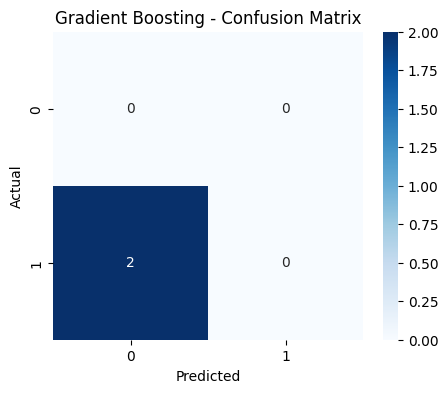

In [12]:
    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()